# Kelompok 9

Nama Kelompok:
1. Adjie Tresnohadi Dermawan
2. Baginda Habiburohman
3. Moses Johanes Febrian Manuputty

## 1. Perkenalan

### 1.1 Latar Belakang
Pada Projek Kali ini akan memuat dataset penggunaan kartu kredit oleh nasabah bank dengan membuat model clustering

### 1.2 Objective yang ingin dicapai
1. Mampu memahami konsep clustering dengan menggunakan Scikit-Learn
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu mengimplementasikan clustering pada data yang diberikan

## 2. Import Pustaka yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

## 3. Data Loading

### 3.1 Import Data

In [2]:
data = pd.read_csv('CC_GENERAL.csv')

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


### 3.2 Cek isi data

In [7]:
data.shape

(8950, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
data.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

In [10]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## 4. Data Cleaning

### 4.1 Menghilangkan Missing Value

In [11]:
median_creditlim = data['CREDIT_LIMIT'].median()
median_minimum = data['MINIMUM_PAYMENTS'].median()
data['CREDIT_LIMIT'].fillna(median_creditlim, inplace=True)
data['MINIMUM_PAYMENTS'].fillna(median_minimum, inplace=True)

In [12]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### 4.2 Cek Data Duplikat

In [14]:
data.duplicated().any()

False

## 5. Data Exploration

Beberapa kolom akan diubah valuenya dari numerical menjadi kategorical untuk mempermudah eksplorasi data

In [15]:
data_eda = pd.DataFrame()

data_eda["BALANCE_FREQUENCY"] = np.where(data["BALANCE_FREQUENCY"] < 1, "not frequently updated", "frequently updated")
data_eda["PURCHASES_FREQUENCY"] = np.where(data["PURCHASES_FREQUENCY"] < 1, "not frequently purchased", "frequently purchased")
data_eda["ONEOFF_PURCHASES_FREQUENCY"] = np.where(data["ONEOFF_PURCHASES_FREQUENCY"] < 1, "not frequently purchased", "frequently purchased")
data_eda["PURCHASES_INSTALLMENTS_FREQUENCY"] = np.where(data["PURCHASES_INSTALLMENTS_FREQUENCY"] < 1, "not frequently done", "frequently done")
data_eda["CASH_ADVANCE_FREQUENCY"] = np.where(data["CASH_ADVANCE_FREQUENCY"] < 1, "not often", "often")

data_eda.head(3)

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
1,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
2,frequently updated,frequently purchased,frequently purchased,not frequently done,not often


In [16]:
data_eda

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
1,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
2,frequently updated,frequently purchased,frequently purchased,not frequently done,not often
3,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
4,frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
...,...,...,...,...,...
8945,frequently updated,frequently purchased,not frequently purchased,not frequently done,not often
8946,frequently updated,frequently purchased,not frequently purchased,not frequently done,not often
8947,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often
8948,not frequently updated,not frequently purchased,not frequently purchased,not frequently done,not often


### 5.1 Masa Berlaku CC

In [17]:
tenure_dist = data.groupby("TENURE").size().sort_values(ascending = False)
tenure_dist

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
dtype: int64

Text(0.5, 1.0, 'Masa Berlaku CC berdasarkan Bulan')

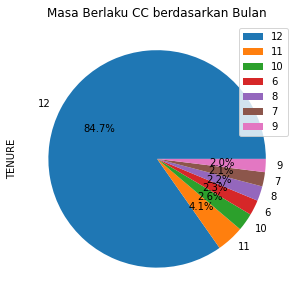

In [18]:
tenure=pd.DataFrame(data['TENURE'].value_counts())
plot = tenure.plot.pie(y='TENURE', figsize=(8, 5), autopct="%1.1f%%")
plt.title("Masa Berlaku CC berdasarkan Bulan")

Disimpulkan bahwa lebih banyak nasabah yang memiliki masa berlaku CC jatuh tempo pada bulan 12

### 5.2 Analisis Penggunaan Saldo Nasabah

In [19]:
balance_freq = data_eda["BALANCE_FREQUENCY"].value_counts(normalize=True)*100

In [20]:
balance_freq

frequently updated        69.396648
not frequently updated    30.603352
Name: BALANCE_FREQUENCY, dtype: float64

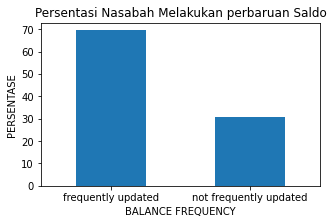

In [21]:
balance_freq.plot(kind='bar', figsize=(5,3))

plt.title('Persentasi Nasabah Melakukan perbaruan Saldo')
plt.xlabel('BALANCE FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], rotation="horizontal")

plt.show()

Disimpulkan bahwa Banyak Nasabah yang lebih melakukan perbaruan Saldo mereka

## 5.3 Analisis Pembelian dari nasabah

In [22]:
purchase_freq = data_eda["PURCHASES_FREQUENCY"].value_counts(normalize=True)*100

In [23]:
purchase_freq

not frequently purchased    75.664804
frequently purchased        24.335196
Name: PURCHASES_FREQUENCY, dtype: float64

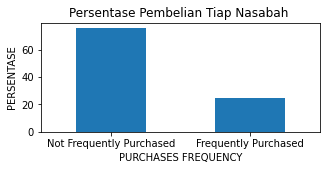

In [24]:
purchase_freq.plot(kind='bar', figsize=(5,2))

plt.title('Persentase Pembelian Tiap Nasabah ')
plt.xlabel('PURCHASES FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Not Frequently Purchased", "Frequently Purchased"], rotation="horizontal")

plt.show()

Disimpulkan bahwa lebih banyak nasabah yang tidak melakukan pembelian menggunakan CC mereka

### 5.4 Analisis Penggunaan metode Cicilan oleh Nasabah

In [25]:
purchases_installments_freq = data_eda["PURCHASES_INSTALLMENTS_FREQUENCY"].value_counts(normalize=True)*100

In [26]:
purchases_installments_freq

not frequently done    85.128492
frequently done        14.871508
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64

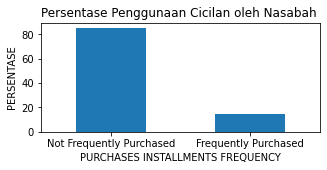

In [27]:
purchases_installments_freq.plot(kind='bar', figsize=(5,2))

plt.title('Persentase Penggunaan Cicilan oleh Nasabah ')
plt.xlabel('PURCHASES INSTALLMENTS FREQUENCY')
plt.ylabel('PERSENTASE')
plt.xticks([0, 1], ["Not Frequently Purchased", "Frequently Purchased"], rotation="horizontal")

plt.show()

Dapat disimpulkan bahwa Nasabah lebih banyak melakukan pembelian tanpa menggunakan cicilan CC mereka

## 6. Preprocessing Data

In [28]:
data = data.drop('CUST_ID', axis=1)

In [29]:
 normalised = normalize(data) 

In [30]:
normalised.shape

(8950, 17)

In [31]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
z

In [32]:
feat_cols = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
            'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX',
            'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
normalised = pd.DataFrame(normalised,columns=feat_cols)
normalised.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,0.025197,0.000884,0.257438,0.000000,0.257438,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884301,0.287924,0.043230,0.000442,0.005306
8946,0.016485,0.000859,0.257808,0.000000,0.257808,0.000000,0.000859,0.000000,0.000716,0.000000,0.000000,0.005156,0.859359,0.237064,0.268415,0.000000,0.005156
8947,0.022773,0.000811,0.140538,0.000000,0.140538,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973257,0.079097,0.080214,0.000243,0.005840
8948,0.026524,0.001642,0.000000,0.000000,0.000000,0.072055,0.000000,0.000000,0.000000,0.000328,0.003942,0.000000,0.985466,0.103572,0.109891,0.000493,0.011826
8949,0.186405,0.000333,0.546776,0.546776,0.000000,0.063538,0.000333,0.000333,0.000000,0.000167,0.001000,0.011503,0.600165,0.031591,0.044157,0.000000,0.003001


In [33]:
for col in data.columns: 
    mean = data[col].mean()
    sd = data[col].std()
    data = data[(data[col] <= mean+4*sd)]

In [34]:
X = np.asarray(data)
scale = StandardScaler()
X = scale.fit_transform(normalised)
X.shape

(8950, 17)

## 6. Modelling

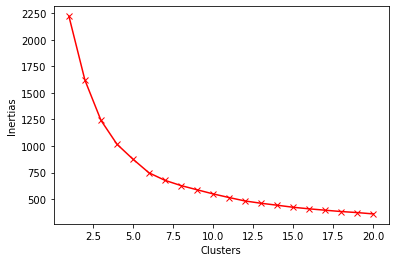

In [35]:
n = 21
inertias=[]
silhouette_scores=[]
for i in range(1,n):
    models= KMeans(i)
    models.fit(normalised)
    inertias.append(models.inertia_)
    if(i > 1):
        silhouette_scores.append(silhouette_score(X, models.fit_predict(X)))
plt.ylabel('Inertias')
plt.xlabel('Clusters')
clusters = [i for i in range(1,21)]
plt.plot(clusters, inertias, 'rx-')

Diperkiraan untuk clusternya berada diantara 3 hingga 10, maka dicari lagi cluster yang tepat dengan menggunakan silhoutte_score

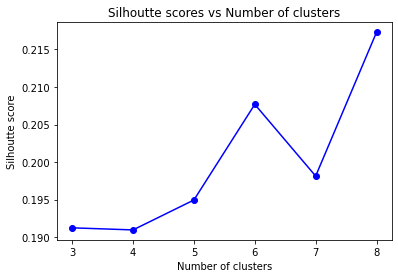

In [42]:
k = [3,4,5,6,7,8]
plt.plot(k, [silhouette_scores[i] for i in range(1,7)], "bo-")
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Pada plot diatas menunjukkan bahwa cluster yang paling tinggi nilainya adalah 6, jadi kita menggunakan 6 cluster

In [37]:
model = KMeans(n_clusters=8)

In [38]:
dist = 1 - cosine_similarity(normalised)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

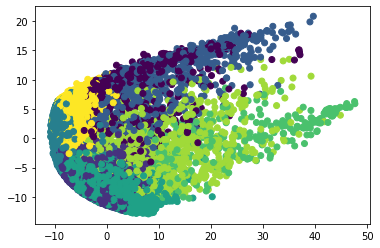

In [51]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
plt.scatter(x, y, c = model.fit_predict(normalised))
plt.show()

In [56]:
kmeans = KMeans(n_jobs=-1, n_clusters=8, init='k-means++')
kmeans.fit(X)
pred = kmeans.predict(X)

C:\Users\adjie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [57]:
print("predict : ",pred)
kmeans.inertia_

predict :  [1 7 1 ... 2 4 3]


71501.69452804497

## 7. Kesimpulan

Berdasarkan model yang telah dibuat, dapat disimpulkan dengan menggunakan K-means dengan jumlah cluster yaitu 8 dengan nilai nilai Inertia K= 8 yaitu 71501